# Toward Predicting the Used Cars Price

## Step 1: `Data Cleaning`

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [6]:
raw_data = pd.read_csv('Usedcarprice.csv')
raw_data.head(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500


In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [8]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [9]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [10]:
data_no_mv = data.dropna(axis=0)

In [11]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

<Axes: xlabel='Price', ylabel='Density'>

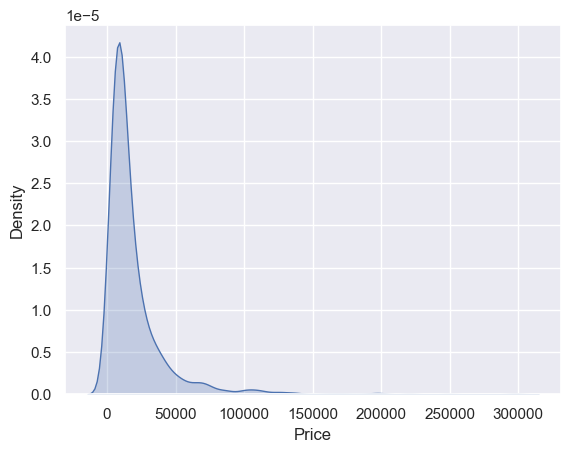

In [12]:
sns.kdeplot(data_no_mv['Price'], fill = True)

### Dealing with outliers

In [13]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<Axes: xlabel='Price', ylabel='Density'>

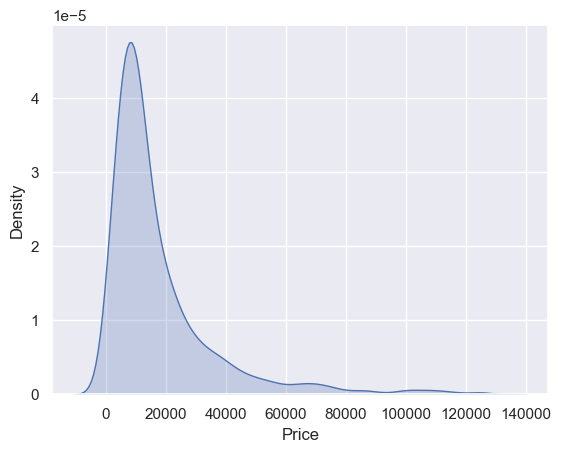

In [32]:
sns.kdeplot(data_1['Price'], fill = True)

<Axes: xlabel='Mileage', ylabel='Density'>

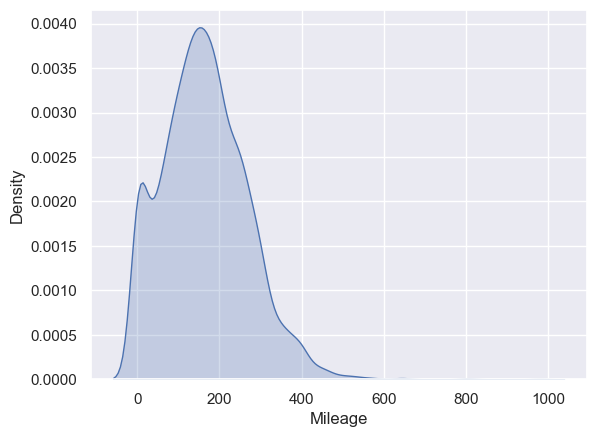

In [14]:
sns.kdeplot(data_no_mv['Mileage'], fill = True)

In [15]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

<Axes: xlabel='Mileage', ylabel='Density'>

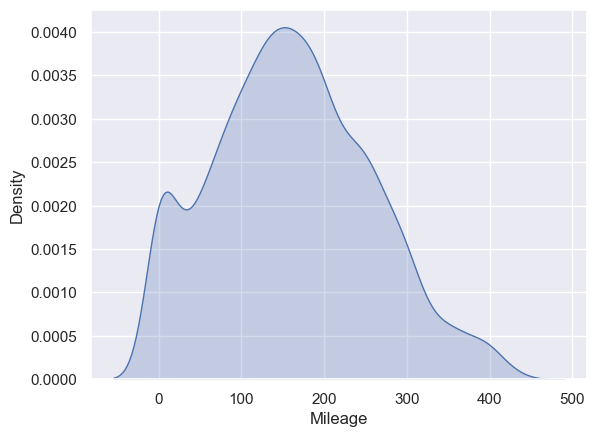

In [16]:
sns.kdeplot(data_2['Mileage'], fill = True)

<Axes: xlabel='EngineV', ylabel='Density'>

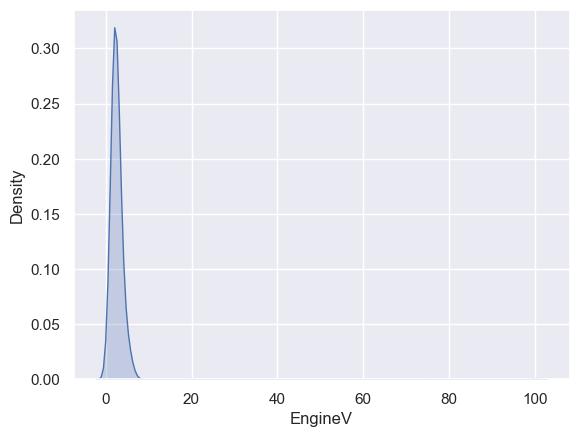

In [17]:
sns.kdeplot(data_no_mv['EngineV'], fill = True)

In [18]:
data_3 = data_2[data_2['EngineV']<6.5]

<Axes: xlabel='EngineV', ylabel='Density'>

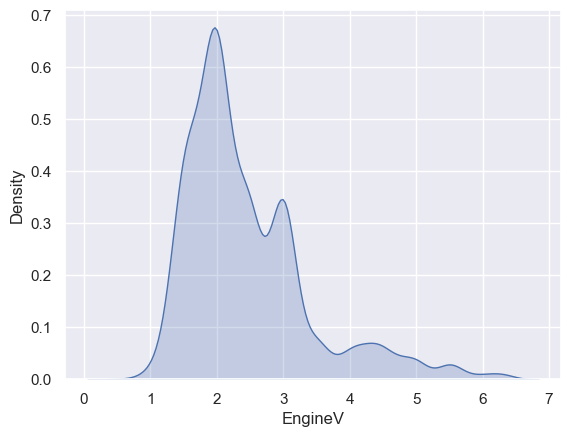

In [23]:
sns.kdeplot(data_3['EngineV'], fill = True)

<Axes: xlabel='Year', ylabel='Density'>

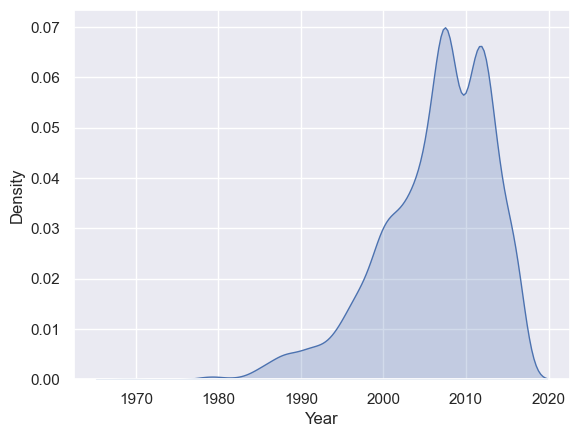

In [22]:
sns.kdeplot(data_no_mv['Year'], fill = True)

In [21]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

<Axes: xlabel='Year', ylabel='Density'>

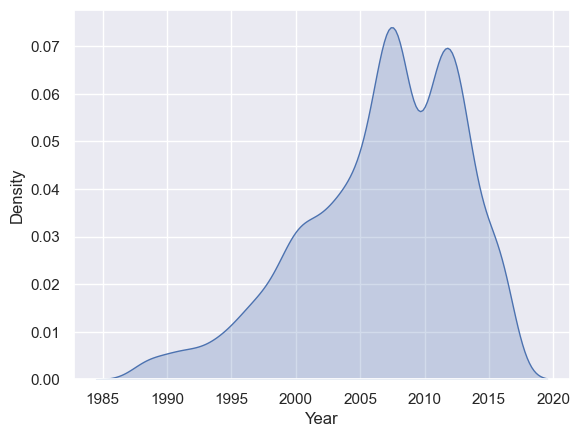

In [34]:
sns.kdeplot(data_4['Year'], fill = True)

In [24]:
data_cleaned = data_4.reset_index(drop=True)

In [25]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Step 2: Checking the `Regression Assumptions`

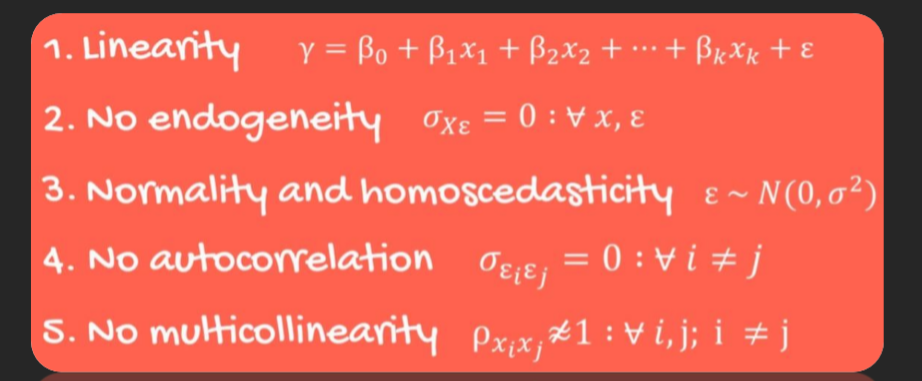

linearity

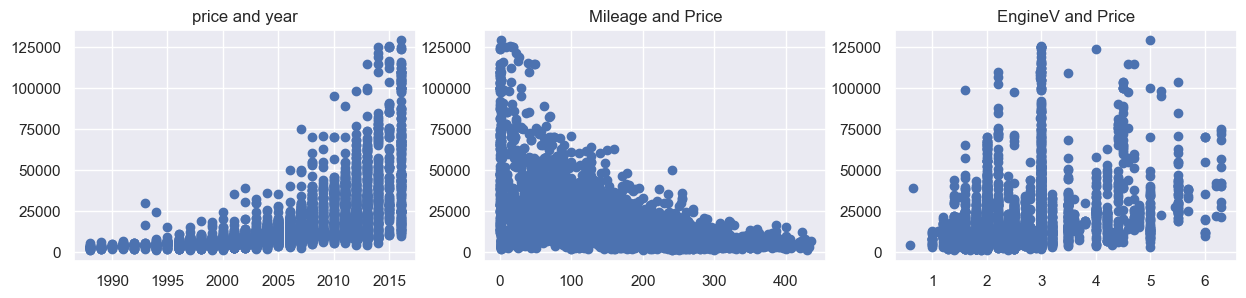

In [26]:
 fig ,(ax1 , ax2,ax3)= plt.subplots(1,3 ,sharey=False ,figsize= (15,3) )
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('price and year')

ax2.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax2.set_title('Mileage and Price')

ax3.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax3.set_title('EngineV and Price')
plt.show()

In [27]:
log_price= np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


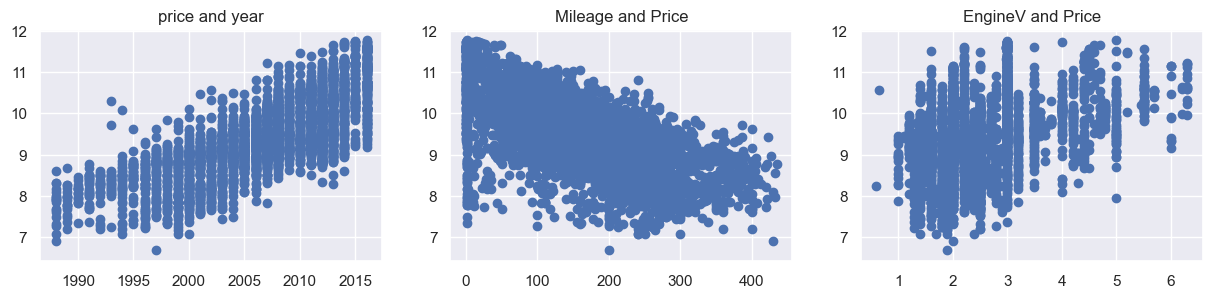

In [28]:
 fig ,(ax1 , ax2,ax3)= plt.subplots(1,3 ,sharey=False ,figsize= (15,3) )
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('price and year')

ax2.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax2.set_title('Mileage and Price')

ax3.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax3.set_title('EngineV and Price')
plt.show()

In [29]:
data_cleaned2= data_cleaned.drop(['Price'] , axis=1)
data_cleaned2

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [30]:
data_cleaned2.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned2[['Mileage','EngineV','Year']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values , i) for i in range(variables.shape[1])]
vif['features']=variables.columns
vif

,VIF,features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


In [32]:
data_no_multicollinearity= data_cleaned.drop(['Year'] , axis=1)
data_no_multicollinearity

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,8.779557


In [36]:
data_with_dummies= pd.get_dummies(data_no_multicollinearity )
data_with_dummies

,Price,Mileage,EngineV,log_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,4200.0,277,2.0,8.342840,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,7900.0,427,2.9,8.974618,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,13300.0,358,5.0,9.495519,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,23000.0,240,4.2,10.043249,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,18300.0,120,2.0,9.814656,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,11500.0,163,2.5,9.350102,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3863,17900.0,35,1.6,9.792556,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
3864,125000.0,9,3.0,11.736069,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3865,6500.0,1,3.5,8.779557,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [41]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_Audi',
       'Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi',
       'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_crossover', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Diesel', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_no',
       'Registration_yes'], dtype=object)

In [44]:
data_withdummies= data_with_dummies.drop(['Price'] , axis=1)
data_withdummies

,Mileage,EngineV,log_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.0,8.342840,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.9,8.974618,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,358,5.0,9.495519,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,240,4.2,10.043249,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120,2.0,9.814656,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
3864,9,3.0,11.736069,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3865,1,3.5,8.779557,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [45]:
data_withdummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes'],
      dtype=object)

In [49]:
new_columns= ['log_price','Mileage', 'EngineV',  'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes']

In [51]:
data_preprocessed=data_withdummies[new_columns]
data_preprocessed

,log_price,Mileage,EngineV,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,8.342840,277,2.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,8.974618,427,2.9,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,9.495519,358,5.0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,10.043249,240,4.2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,9.814656,120,2.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
3864,11.736069,9,3.0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3865,8.779557,1,3.5,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [52]:
targets= data_preprocessed['log_price']
inputs= data_preprocessed.drop(['log_price'] , axis=1)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
scaled_inputs= scaler.transform(inputs)


In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(scaled_inputs , targets , test_size= 0.2 , random_state=42)

In [55]:
reg = LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

In [61]:
y_hat= reg.predict(x_train)

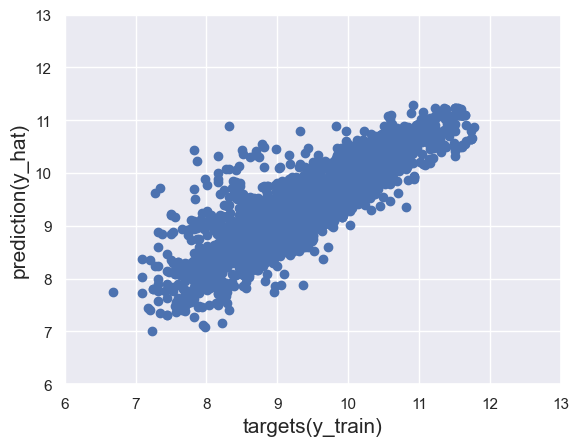

In [63]:
plt.scatter(y_train, y_hat)
plt.xlabel('targets(y_train)' , size=15)
plt.ylabel('prediction(y_hat)' , size=15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'residuals')

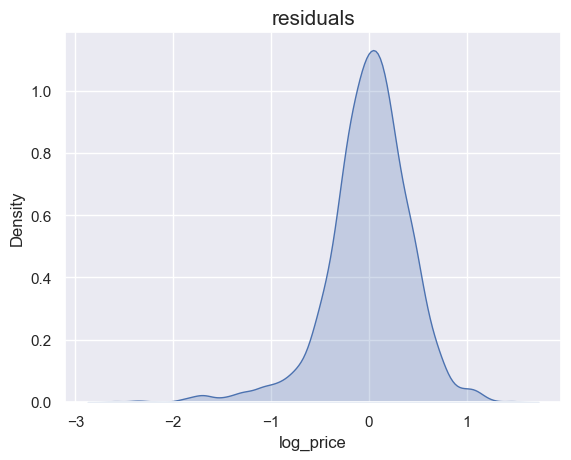

In [68]:
sns.kdeplot(y_train - y_hat , fill=True)
plt.title('residuals' , size=15)

In [69]:
reg.score(x_train , y_train)

0.7546484300185885

In [70]:
reg.intercept_

9.420785951926952

In [71]:
reg.coef_

array([-4.68153240e-01,  2.15258801e-01,  1.37763154e+10,  1.64965636e+10,
        1.77754656e+10,  1.20326409e+10,  1.41264475e+10,  1.50207941e+10,
        1.85548394e+10, -2.68396866e+10, -1.64224370e+10, -1.95358336e+10,
       -3.22258178e+10, -1.95829597e+10, -2.42078972e+10, -4.33183032e+10,
       -3.07343531e+10, -1.37129785e+10, -4.16806186e+10,  6.35405365e+08,
        6.35405365e+08])

In [76]:
reg_summary = pd.DataFrame(inputs.columns.values , columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-4.681532e-01
1,EngineV,2.152588e-01
2,Brand_Audi,1.377632e+10
3,Brand_BMW,1.649656e+10
4,Brand_Mercedes-Benz,1.777547e+10
5,Brand_Mitsubishi,1.203264e+10
6,Brand_Renault,1.412645e+10
7,Brand_Toyota,1.502079e+10
8,Brand_Volkswagen,1.855484e+10
9,Body_crossover,-2.683969e+10


In [77]:
y_hat_test= reg.predict(x_test)

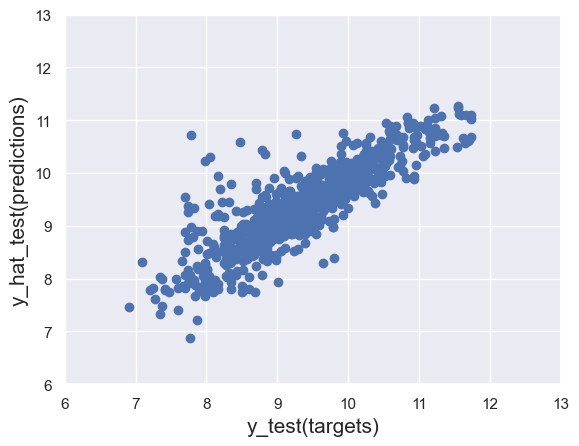

In [80]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('y_test(targets)' , size=15)
plt.ylabel('y_hat_test(predictions)' , size=15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [81]:
df_performance= pd.DataFrame(np.exp(y_hat_test) , columns=['predictions'])
df_performance

,predictions
0,40411.695472
1,7954.742429
2,5756.060757
3,9762.987525
4,7025.875873
...,...
769,4698.649891
770,9121.061729
771,6266.608272
772,20901.108971


In [82]:
df_performance['Target']=np.exp(y_test)
df_performance

,predictions,Target
0,40411.695472,4200.0
1,7954.742429,NaN
2,5756.060757,NaN
3,9762.987525,NaN
4,7025.875873,NaN
...,...,...
769,4698.649891,NaN
770,9121.061729,NaN
771,6266.608272,NaN
772,20901.108971,NaN


In [83]:
y_test= y_test.reset_index(drop=True)
y_test

0       9.966462
1       9.093807
2       8.086410
3       9.392662
4       8.594154
         ...    
769     8.342840
770     9.082507
771     8.486734
772    10.203592
773     9.296518
Name: log_price, Length: 774, dtype: float64

In [84]:
df_performance

,predictions,Target
0,40411.695472,4200.0
1,7954.742429,NaN
2,5756.060757,NaN
3,9762.987525,NaN
4,7025.875873,NaN
...,...,...
769,4698.649891,NaN
770,9121.061729,NaN
771,6266.608272,NaN
772,20901.108971,NaN


In [85]:
df_performance['Target']=np.exp(y_test)
df_performance

,predictions,Target
0,40411.695472,21300.0
1,7954.742429,8900.0
2,5756.060757,3250.0
3,9762.987525,12000.0
4,7025.875873,5400.0
...,...,...
769,4698.649891,4200.0
770,9121.061729,8800.0
771,6266.608272,4850.0
772,20901.108971,27000.0
